In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2021-04.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.915422,6.925367,50.915671,6.925253,2021-04-27 21:59:01,2021-04-27 22:00:02,1.0,29.0,44144283,44159265,255.0,NaN,BIKE 220163,1417
1,50.915671,6.925253,50.912898,6.928297,2021-04-28 06:03:01,2021-04-28 15:29:02,566.0,375.0,44159265,44189418,483.0,NaN,BIKE 220163,1516
2,50.912898,6.928297,50.916556,6.959993,2021-04-28 18:11:01,2021-04-28 18:26:01,15.0,2260.0,44189418,44203692,162.0,NaN,BIKE 220163,1439
3,50.916556,6.959993,50.916480,6.959998,2021-04-28 19:11:01,2021-04-28 19:13:02,2.0,8.0,44203692,44207669,45.0,NaN,BIKE 220163,1413
4,50.916480,6.959998,50.924396,6.934240,2021-04-29 12:03:01,2021-04-29 12:15:01,12.0,2009.0,44207669,44236668,1010.0,NaN,BIKE 220163,1422


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

60429

In [14]:
len(out_distances_total)

21563

In [15]:
len(out_rides)

20816

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

24245

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

18134

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

12.0      74
9.0       66
5.0       64
15.0      63
8.0       61
6.0       60
18.0      54
13.0      53
11.0      52
10.0      50
14.0      50
16.0      47
17.0      47
7.0       47
4.0       42
28.0      41
24.0      40
22.0      39
20.0      39
3.0       39
23.0      38
21.0      36
19.0      33
425.0     32
516.0     31
25.0      30
31.0      30
523.0     29
793.0     28
36.0      28
          ..
6665.0     1
5128.0     1
6699.0     1
9113.0     1
4631.0     1
6862.0     1
7356.0     1
5156.0     1
2647.0     1
4500.0     1
6933.0     1
5733.0     1
7002.0     1
6089.0     1
8337.0     1
6152.0     1
4294.0     1
5098.0     1
5661.0     1
5911.0     1
5063.0     1
4623.0     1
4169.0     1
8714.0     1
9583.0     1
4182.0     1
5524.0     1
4228.0     1
4723.0     1
6714.0     1
Name: distance, Length: 5885, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

3429

In [23]:
len(out_distances + out_rides)

24245

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

40.121464859587284


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36184 entries, 0 to 36183
Data columns (total 15 columns):
index                   36184 non-null int64
lat_begin               36184 non-null float64
lng_begin               36184 non-null float64
lat_end                 36184 non-null float64
lng_end                 36184 non-null float64
ride_begin              36184 non-null object
ride_end                36184 non-null object
ride_time               36184 non-null float64
distance                36184 non-null float64
uid_begin               36184 non-null int64
uid_end                 36184 non-null int64
standing_before_ride    36184 non-null float64
address                 139 non-null object
name                    36184 non-null object
available_bikes         36184 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 4.1+ MB


In [27]:
df_c['distance'].value_counts()

425.0     32
516.0     31
523.0     29
793.0     28
495.0     26
578.0     26
481.0     25
427.0     25
699.0     25
1335.0    25
617.0     24
438.0     24
639.0     24
1106.0    24
637.0     24
729.0     24
848.0     24
550.0     24
665.0     23
599.0     23
766.0     23
541.0     23
498.0     23
464.0     23
691.0     23
450.0     23
531.0     23
526.0     23
525.0     23
470.0     23
          ..
4229.0     1
4164.0     1
7571.0     1
6305.0     1
3183.0     1
5893.0     1
4371.0     1
5650.0     1
5645.0     1
5354.0     1
9583.0     1
7457.0     1
6214.0     1
4557.0     1
7983.0     1
5270.0     1
4500.0     1
6376.0     1
6529.0     1
9113.0     1
6524.0     1
4008.0     1
4628.0     1
5416.0     1
5520.0     1
8010.0     1
3990.0     1
5309.0     1
5304.0     1
6714.0     1
Name: distance, Length: 5673, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

8.0      1593
7.0      1512
9.0      1511
10.0     1458
6.0      1426
11.0     1407
12.0     1310
13.0     1256
14.0     1251
16.0     1150
5.0      1146
15.0     1137
18.0     1062
17.0     1055
19.0      991
20.0      868
21.0      801
22.0      778
4.0       767
23.0      690
24.0      670
26.0      602
25.0      588
27.0      545
28.0      506
29.0      502
30.0      453
31.0      404
32.0      349
33.0      344
         ... 
530.0       1
332.0       1
525.0       1
338.0       1
631.0       1
653.0       1
688.0       1
527.0       1
634.0       1
626.0       1
638.0       1
428.0       1
663.0       1
606.0       1
317.0       1
319.0       1
459.0       1
430.0       1
526.0       1
684.0       1
488.0       1
360.0       1
578.0       1
429.0       1
416.0       1
508.0       1
350.0       1
471.0       1
514.0       1
543.0       1
Name: ride_time, Length: 565, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[8,
 38,
 53,
 62,
 93,
 270,
 279,
 319,
 320,
 330,
 333,
 334,
 357,
 429,
 478,
 485,
 599,
 618,
 620,
 673,
 728,
 894,
 930,
 1009,
 1018,
 1029,
 1048,
 1054,
 1055,
 1093,
 1094,
 1112,
 1113,
 1126,
 1127,
 1135,
 1230,
 1232,
 1281,
 1295,
 1302,
 1441,
 1458,
 1459,
 1482,
 1503,
 1510,
 1525,
 1534,
 1539,
 1604,
 1764,
 1766,
 1801,
 1805,
 1836,
 1858,
 1866,
 1872,
 1907,
 1923,
 2007,
 2032,
 2097,
 2134,
 2136,
 2148,
 2172,
 2185,
 2220,
 2270,
 2321,
 2404,
 2444,
 2452,
 2460,
 2485,
 2501,
 2513,
 2524,
 2558,
 2563,
 2595,
 2607,
 2615,
 2632,
 2734,
 2779,
 2806,
 2831,
 2847,
 2850,
 2877,
 2879,
 2935,
 3021,
 3022,
 3055,
 3060,
 3066,
 3072,
 3111,
 3143,
 3144,
 3156,
 3267,
 3307,
 3339,
 3349,
 3377,
 3453,
 3490,
 3515,
 3523,
 3548,
 3763,
 3767,
 3821,
 3825,
 3874,
 3875,
 3876,
 3898,
 3900,
 3906,
 3940,
 3978,
 3979,
 3999,
 4018,
 4019,
 4043,
 4051,
 4096,
 4148,
 4165,
 4245,
 4315,
 4319,
 4322,
 4325,
 4328,
 4353,
 4409,
 4481,
 4483,
 4508,


In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
8,13,50.955797,7.006498,50.954535,7.004142,2021-04-05 10:59:01,2021-04-05 11:29:01,30.0,217.0,43121841,43175917,2552.0,NaN,BIKE 21446,687
38,53,50.984867,6.887804,50.986658,6.890361,2021-04-15 03:32:01,2021-04-15 03:37:01,5.0,268.0,43534657,43555531,744.0,NaN,BIKE 21748,633
53,71,50.930114,6.937847,50.931105,6.941108,2021-04-20 19:54:01,2021-04-20 20:29:01,35.0,254.0,43806352,43807957,15.0,NaN,BIKE 21748,508
62,82,50.916267,6.926736,50.917653,6.929187,2021-04-24 19:03:01,2021-04-24 22:57:02,234.0,231.0,43999259,44013571,57.0,NaN,BIKE 220601,1392
93,123,50.900031,6.984900,50.902275,6.983168,2021-04-17 18:43:01,2021-04-17 20:53:02,130.0,278.0,43665902,43678506,150.0,NaN,BIKE 22213,577
270,882,50.966164,6.981325,50.964429,6.978854,2021-04-16 06:04:01,2021-04-16 06:10:02,6.0,259.0,43578140,43601484,782.0,NaN,BIKE 22129,613
279,896,50.948067,6.926995,50.949215,6.930568,2021-04-24 15:19:02,2021-04-24 18:09:01,170.0,281.0,43977461,43999113,195.0,NaN,BIKE 22129,1283
319,957,50.975870,6.944858,50.973642,6.944640,2021-04-03 13:22:02,2021-04-03 13:29:01,7.0,248.0,43104249,43114943,660.0,NaN,BIKE 210153,751
320,980,50.975391,6.942310,50.973459,6.941350,2021-04-03 22:08:01,2021-04-03 22:19:02,11.0,225.0,43120087,43133724,387.0,NaN,BIKE 210153,676
330,995,50.914017,6.947715,50.912760,6.944452,2021-04-08 16:20:02,2021-04-08 20:13:01,233.0,268.0,43278497,43296116,128.0,NaN,BIKE 210153,699


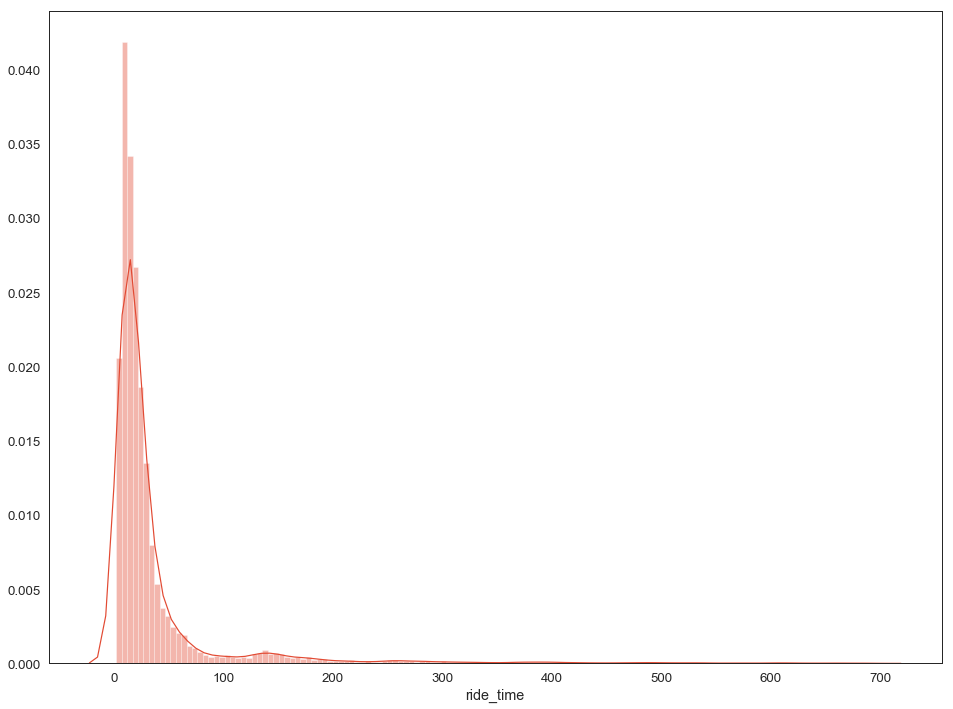

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

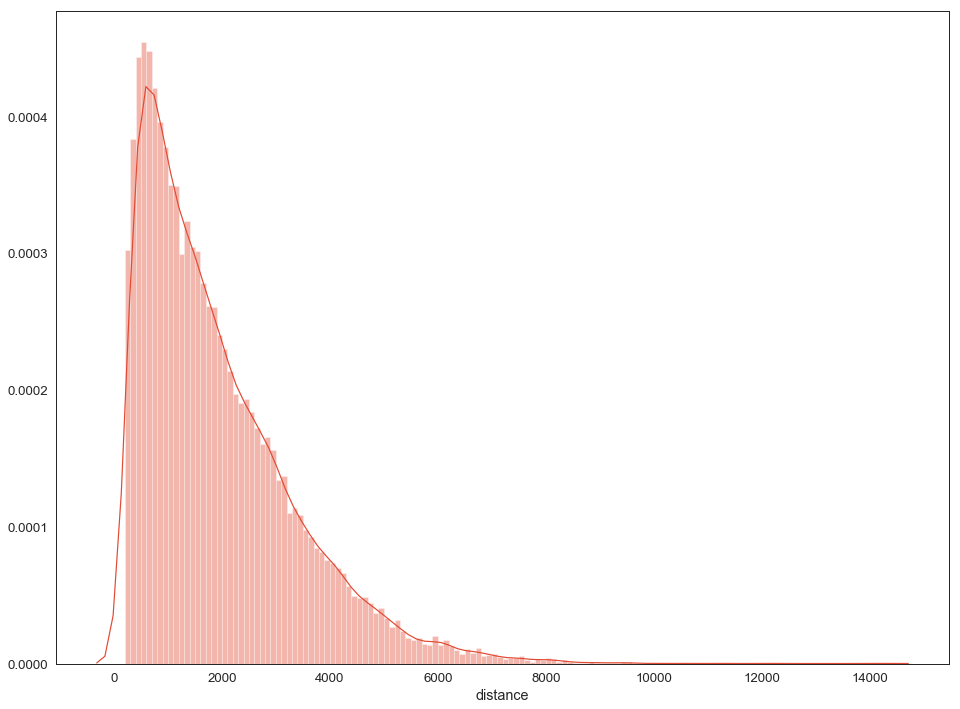

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
118,150,50.939955,6.938640,50.958675,6.898219,2021-04-01 01:32:01,2021-04-01 01:54:01,22.0,3515.0,43014278,43015742,89.0,"Limburger Str. 24, 50672 Köln",BIKE 21957,715
504,1219,50.943087,6.881748,50.936241,6.948559,2021-04-03 21:07:02,2021-04-03 21:53:02,46.0,4744.0,43049703,43133258,2856.0,Vitalisstraße & Stolberger Straße,BIKE 21717,698
913,2040,50.947617,6.922375,50.956243,6.933681,2021-04-23 11:42:01,2021-04-23 11:53:02,11.0,1244.0,43860963,43928817,2372.0,Simrockstraße,BIKE 22782,509
1254,2879,50.923582,6.919813,50.933293,6.923348,2021-04-30 18:49:02,2021-04-30 18:58:02,9.0,1108.0,44262564,44308434,1359.0,"Köln, Kerpener Str. 62",BIKE 220856,1493
1330,2989,50.945964,6.942590,50.929013,6.944567,2021-04-30 18:26:01,2021-04-30 18:41:02,15.0,1891.0,44304611,44307311,22.0,Hermann-Becker-Str. 10,BIKE 221105,1461
1345,3016,50.930960,6.917094,50.928198,6.909092,2021-04-07 10:48:03,2021-04-07 11:08:02,20.0,640.0,43215294,43235618,753.0,Dürenerstr. 142,BIKE 21954,725
1476,3204,50.918938,6.963504,50.926523,6.938712,2021-04-07 08:38:02,2021-04-07 08:51:01,13.0,1932.0,43224146,43232742,531.0,Teutoburgerstr. 29,BIKE 22469,738
1912,3801,50.931073,6.929774,50.921302,6.933836,2021-04-21 17:16:02,2021-04-21 17:23:03,7.0,1124.0,43846330,43848671,19.0,Köln; Bachemer Straße / Alphons-Silbermann-Weg,BIKE 22826,500
2203,4171,50.923764,6.954590,50.923591,6.963221,2021-04-28 20:57:01,2021-04-28 21:00:01,3.0,605.0,44198774,44214822,208.0,Karthäuserwall 61,BIKE 220944,1406
2524,4595,50.922780,6.942971,50.924114,6.945379,2021-04-10 19:19:02,2021-04-10 20:20:01,61.0,225.0,43380184,43390058,36.0,Eifelstraße 62,BIKE 21578,693


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
1137,2723,50.936956,6.978141,50.933542,6.986425,2021-04-30 15:02:02,2021-04-30 15:10:02,8.0,694.0,44292989,44293768,5.0,NaN,BIKE 220874,1498
1138,2724,50.933542,6.986425,50.937476,6.978743,2021-04-30 16:17:01,2021-04-30 16:50:02,33.0,694.0,44293768,44299733,67.0,NaN,BIKE 220874,1487
1458,3186,50.948786,6.957082,50.951424,6.957013,2021-04-26 12:30:02,2021-04-26 13:14:02,44.0,293.0,44070413,44076678,114.0,NaN,BIKE 210185,1516
1459,3187,50.951424,6.957013,50.950863,6.961095,2021-04-26 13:22:01,2021-04-26 13:29:01,7.0,293.0,44076678,44077346,8.0,NaN,BIKE 210185,1479
1829,3674,50.908974,6.936318,50.910897,6.942283,2021-04-16 20:20:02,2021-04-16 20:42:01,22.0,470.0,43595418,43639763,1349.0,NaN,BIKE 22083,666
1830,3675,50.910897,6.942283,50.908938,6.936344,2021-04-16 20:42:01,2021-04-16 20:48:02,6.0,470.0,43639763,43639949,0.0,NaN,BIKE 22083,647
2623,4713,50.944120,6.944429,50.997435,6.921376,2021-04-06 19:33:01,2021-04-06 20:06:02,33.0,6146.0,43198692,43220206,663.0,NaN,BIKE 21132,735
2624,4714,50.997435,6.921376,50.944100,6.944302,2021-04-08 07:48:01,2021-04-08 08:17:01,29.0,6146.0,43220206,43267850,2142.0,NaN,BIKE 21132,720
3555,5984,50.917860,6.959345,50.931396,6.955819,2021-04-13 18:35:01,2021-04-13 18:52:02,17.0,1526.0,43442104,43505880,2497.0,NaN,BIKE 23617,707
3556,5985,50.931396,6.955819,50.917869,6.959487,2021-04-13 18:57:01,2021-04-13 19:07:01,10.0,1526.0,43505880,43506501,5.0,NaN,BIKE 23617,620


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
860,1982,50.943397,6.963819,50.894446,6.983421,2021-04-08 09:41:02,2021-04-08 09:43:02,2.0,5616.0,43268863,43270163,46.0,NaN,BIKE 22782,726,1500.0
3694,6175,50.951587,6.954955,50.937680,6.985275,2021-04-30 15:38:02,2021-04-30 15:40:01,2.0,2628.0,44280546,44295448,300.0,NaN,BIKE 221064,1518,1500.0
7861,13750,50.938956,7.004966,50.909769,6.962392,2021-04-25 19:03:01,2021-04-25 19:05:01,2.0,4410.0,44047410,44050212,45.0,NaN,BIKE 220754,1423,1500.0
8426,14565,50.974172,6.965221,50.950424,6.908920,2021-04-13 19:06:02,2021-04-13 19:11:01,5.0,4747.0,43503513,43506674,69.0,NaN,BIKE 22746,619,4000.0
8623,14836,50.946863,6.956745,50.918248,6.912669,2021-04-10 19:52:01,2021-04-10 19:59:01,7.0,4436.0,43331608,43389105,1586.0,Eigelstein 32,BIKE 22962,632,4000.0
8641,14857,51.015588,7.071498,50.940898,7.005013,2021-04-17 19:33:01,2021-04-17 19:48:02,15.0,9524.0,43673332,43676058,45.0,NaN,BIKE 22962,602,6500.0
14339,24044,50.960369,6.948975,50.924150,6.943777,2021-04-04 17:39:01,2021-04-04 17:44:01,5.0,4045.0,43147882,43157794,227.0,NaN,BIKE 21994,715,4000.0
14535,24333,50.924323,6.978697,50.864596,7.157519,2021-04-14 17:37:01,2021-04-14 17:41:01,4.0,14196.0,43541399,43542070,13.0,NaN,BIKE 21582,612,4000.0
15668,25862,50.971089,6.968458,50.930746,6.982590,2021-04-27 19:29:02,2021-04-27 19:36:02,7.0,4595.0,44140597,44152661,156.0,NaN,BIKE 23684,1439,4000.0
20429,33944,50.918519,6.934105,50.937548,6.933190,2021-04-22 13:04:01,2021-04-22 13:07:01,3.0,2118.0,43863837,43886602,957.0,NaN,BIKE 22471,528,1500.0


In [46]:
len(unmatched_distances)

16

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                               36030
Rohnstraße 48                                         2
Köln - Südburgstraße 91                               1
ölstraße 10                                           1
Hauptbahnhof Köln                                     1
Köln - Kreuzerstraße                                  1
Köln - Severinstraße 155                              1
Limburger Str. 24, 50672 Köln                         1
Brüsselerplatz                                        1
Köln - Neusser Str. 235                               1
Florastraße 1a                                        1
Ehrenfeld Venlorstr. Köln                             1
Vitalisstraße & Stolberger Straße                     1
Köln, Kerpener Str. 62                                1
Köln - Neumarkt                                       1
Köln - Merheimerstraße                                1
Köln Hauptbahnhof                                     1
Cäsarstraße                                     

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-04.csv', sep=';', index=False) 

In [52]:
len(df_c)

36168